## Marketplace Feature Table 

Client **ComZ** is an ecommerce company. The company wants to focus on targeting the right customers  with the right products to increase overall revenue and conversion rate.

To target the right customers with the right products, they need to build an ML model for marketing based on user interaction with products in the past like number of views,  most viewed product, number of activities of user, vintage of user and others. 

ComZ has contacted the Data Science and Engineering team to use this information to fuel the personalized advertisements, email marketing campaigns, or special offers on the landing and category pages of the company's website.

You, being a part of the data engineering team, are expected to “Develop input features”  for the efficient marketing model given the Visitor log data and User Data.

## Visitor Log Data

It is a browsing log data of all the visitors and the users. This contains the following information:

#### WebClientID

Unique ID of browser for every system. (If a visitor is using multiple browsers on a system like Chrome, Safari, then there would be a different web clientid for each browser). The ID remains consistent unless the user clears their cookie.

#### VisitDateTime
Date and time of visit. There are two different formats for DateTime. 

>One is in datetime format “2018-05-07 04:28:45.970”

>Another one is in unix datetime format “1527051855673000000”

#### ProductID
Unique ID of product browsed/ clicked by the visitor

#### UserID
Unique ID of the registered user. As expected, this is available for registered users only, not for all visitors. 

#### Activity
Type of activity can be browsing (pageload) or clicking a product

#### Browser
Browser used by the visitor

#### OS
Operating System of the system used by the visitor

#### City
City of the visitor

#### Country
Country of the visitor

## User Data
It has registered user information like signup date and segment.

> UserID-
Unique ID of the registered user.

> Signup Date-
Date of registration for the user

> User Segment-
User Segment (A/B/C) created based on historical engagement

Now based on the above information,we need to create an input feature set for the Marketing Model.

## Input Feature table

### Joinging user_data and visit_log_data to make the raw table.
-From the raw table, we'll gather the following information required to make INPUT: input_feature_df.

### Input Feature Dataframe

-UserID

-No_of_days_Visited_7_Days¶:How many days a user was active on platform in the last 7 days

-No_Of_Products_Viewed_15_Days:Number of Products viewed by the user in the last 15 days

-User_Vintage:Vintage (In Days) of the user as of today

-Most_Viewed_product_15_Days: Most frequently viewed (page loads) product by the user in the last 15 days. If there are multiple products that have a similar number of page loads then , consider the recent one. If a user has not viewed any product in the last 15 days then put it as Product101.

-Most_Active_OS:Most Frequently used OS by user

-Recently_Viewed_Product: Most recently viewed (page loads) product by the user. If a user has not viewed any product then put it as Product101.

-Pageloads_last_7_days: Count of Page loads in the last 7 days by the user

-Clicks_last_7_days: Count of Clicks in the last 7 days by the user

### Process to create Input Feature:

When ComZ does a targeting campaign, It follows the below process:

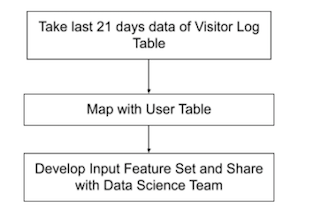

### Submission:

Use Visitor Log Data and User Data to generate the features mentioned in the sample submission 

You are supposed to generate all the features for all the users as mentioned in the sample submission or input feature table 

Make sure your submission file’s rows (user ids) are in the same order as mentioned in the sample submission.

In [ ]:
import numpy as np
import pandas as pd
import re,os,time,gc
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
chunksize=200000
start = time.time()
tfr = pd.read_csv("../input/av-june-21/VisitorLogsData.csv",parse_dates=True,chunksize=chunksize,iterator=True)
visitor_log  = pd.concat(tfr, ignore_index=True)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

In [ ]:
visitor_log.info(null_counts=True)

#### 6.5 million rows and 9 columns

In [ ]:
visitor_log.head(2)

#### We are supposed to generate an input feature set as on 28-May-2018. So, the visitor table is from 07-May-2018 to 27-May-2018.

## Check missing values

#### Product_ID

In [ ]:
visitor_log['ProductID'].isna().sum()

In [ ]:
print("Number of Products:",len(visitor_log['ProductID'].unique()))

### User_ID

In [ ]:
print("No.of Non-registered Users:", visitor_log['UserID'].isna().sum(),"- ",round(((visitor_log['UserID'].isnull().sum())/len(visitor_log))*100),"%")

#### We'll drop all non-registered/ na values after processissing last column

### Activity

In [ ]:
visitor_log['Activity'].fillna('pageload',inplace=True) # Those Users didnot click - just browsers

In [ ]:
sum(visitor_log['Activity'].isna())

In [ ]:
visitor_log['Activity'].replace("CLICK","click",inplace=True)
visitor_log['Activity'].replace("PageLoad","pageload",inplace=True)
visitor_log['Activity'].replace("PAGELOAD","pageload",inplace=True)

In [ ]:
visitor_log['Activity'].value_counts()

In [ ]:
sns.set_context("notebook", font_scale=1.1)
plt.figure(figsize=(5,5))
sns.countplot(visitor_log['Activity'])

In [ ]:
gc.collect()

### Browser

In [ ]:
visitor_log['Browser'].replace("Samsung Internet","Chrome",inplace=True)
visitor_log['Browser'].replace("Facebook","Chrome",inplace=True)
visitor_log['Browser'].replace("Apple Mail","Safari",inplace=True)
visitor_log['Browser'].replace("HeadlessChrome","Chrome",inplace=True)
visitor_log['Browser'].replace("Chrome Mobile WebView","Chrome Mobile",inplace=True)
visitor_log['Browser'].replace("Chrome Mobile iOS","Chrome Mobile",inplace=True)
visitor_log['Browser'].replace("IE","Internet Explorer",inplace=True)
visitor_log['Browser'].replace("Edge","Internet Explorer",inplace=True)

In [ ]:
sns.set_context("notebook", font_scale=1.1)
plt.figure(figsize=(15,15))
sns.countplot(y=visitor_log['Browser'])

In [ ]:
gc.collect()

### OS

In [ ]:
visitor_log['OS'].value_counts()

In [ ]:
visitor_log['OS']=visitor_log['OS'].replace("windows","Windows")
visitor_log['OS']=visitor_log['OS'].replace("Windows Phone","Windows")
visitor_log['OS']=visitor_log['OS'].replace("Mac OS X","iOS")
visitor_log['OS']=visitor_log['OS'].replace("mac os x","iOS")
visitor_log['OS']=visitor_log['OS'].replace("ios","iOS")
visitor_log['OS']=visitor_log['OS'].replace("android","Android")
visitor_log['OS']=visitor_log['OS'].replace("linux","Linux")
visitor_log['OS']=visitor_log['OS'].replace("ubuntu","Ubuntu")
visitor_log['OS']=visitor_log['OS'].replace("solaris","Solaris")
visitor_log['OS']=visitor_log['OS'].replace("freebsd","FreeBSD")
visitor_log['OS']=visitor_log['OS'].replace("fedora","Fedora")
visitor_log['OS']=visitor_log['OS'].replace("chrome os","Chrome OS")
visitor_log['OS']=visitor_log['OS'].replace("tizen","Other")
visitor_log['OS']=visitor_log['OS'].replace("Tizen","Other")
visitor_log['OS']=visitor_log['OS'].replace("Kindle","Other")
visitor_log['OS']=visitor_log['OS'].replace("NetBSD","Other")
visitor_log['OS']=visitor_log['OS'].replace("other","Other")

In [ ]:
sns.set_context("notebook", font_scale=1.1)
plt.figure(figsize=(10,5))
sns.countplot(y=visitor_log['OS'])

In [ ]:
gc.collect()

### VisitDateTime

In [ ]:
visitor_log['VisitDateTime'].isnull().sum()

In [ ]:
visitor_log['VisitDateTime'].fillna("2018-05-07 00:00:00",inplace=True) # first day of visitors_log to be considered, time is random

In [ ]:
visitor_log['VisitDateTime'].isnull().sum()

In [ ]:
for col in visitor_log.columns[2:9]:
    if visitor_log[col].dtype=='object':
        visitor_log[col]=visitor_log[col].astype('category')
        
visitor_log.info(null_counts=True)

In [ ]:
user_data = pd.read_csv("../input/av-june-21/userTable.csv")
user_data['Signup Date']=user_data['Signup Date'].astype('datetime64[ns]')
user_data.info()

In [ ]:
user_data.head(2)

In [ ]:
print("No.of UserIDs:",len(user_data['UserID'].unique()))
print()
print("End_Date_Time  :",user_data['Signup Date'].max())
print()
print("Start_Date_Time:",user_data['Signup Date'].min())

### Splitting the original data into filtered_df and visitor_log2 and merging after processing VisitDateTime column

In [ ]:
log_data = visitor_log[visitor_log['UserID']!=""]
log_data.head()

In [ ]:
len(list(set(log_data['UserID'].unique())))

#### Filtering the data based on start date and end date specified in the problem statemet

In [ ]:
filtered_df = log_data.loc[log_data["VisitDateTime"].between('2018-05-07', '2019-05-27')]
filtered_df.info()

In [ ]:
filtered_df.head(2)

In [ ]:
print("End_Date_Time  :",filtered_df['VisitDateTime'].max())
print()
print("Start_Date_Time:",filtered_df['VisitDateTime'].min())

In [ ]:
filtered_df.info()

In [ ]:
d_values= filtered_df["VisitDateTime"].values
d_values

### Filter the VisitDateTime strings from Visitor_log data 

In [ ]:
visitor_log2 = log_data.loc[~log_data['VisitDateTime'].isin(d_values)]
visitor_log2.head()

In [ ]:
filtered_df['VisitDateTime']=filtered_df['VisitDateTime'].astype('datetime64[ns]')
filtered_df.info()

#### Convert the Unix timestamps of visitor_log2 into datetime64 format 

In [ ]:
impute_fn = lambda x: pd.to_datetime(int(str(x)))

In [ ]:
visitor_log2["VisitDateTime"] = visitor_log2["VisitDateTime"].apply(impute_fn)

In [ ]:
visit_log_data = pd.concat([visitor_log2,filtered_df],ignore_index=True)

In [ ]:
visit_log_data.info()

### Check the preprocessed visitor details dataframe

- filtered out UsedIDs =nan 

- Selected the rows from dates between 07/05/2018 & 27/06/2018

In [ ]:
print("No.of Registered Users:",len(visit_log_data['UserID'].unique()))

In [ ]:
print("Start Date:",visit_log_data["VisitDateTime"].min())

In [ ]:
print("End Date:",visit_log_data["VisitDateTime"].max())

In [ ]:
visit_log_data.head(5) # converted VisitDateTime formats to datetime64 datatype

In [ ]:
# delete unused variables

del visitor_log,visitor_log2,filtered_df,d_values,log_data
gc.collect()

### Joinging user_data and visit_log_data to make the raw table.
-From the raw table, we'll gather the following information required to make INPUT: input_feature_df.

### Input Feature Dataframe

In [ ]:
if_data= pd.merge(
    left=visit_log_data,
    right=user_data,
    how="inner",
    on='UserID',
    sort=True,
    copy=True)

In [ ]:
if_data['VisitDateTime']=if_data['VisitDateTime'].astype('datetime64[ns]')

In [ ]:
convert2date_fn = lambda x: x.strftime("%Y-%m-%d")
if_data['VisitDate'] = if_data['VisitDateTime'].apply(convert2date_fn)
if_data['Sign_Date'] = if_data['Signup Date'].apply(convert2date_fn)

In [ ]:
if_data2 = if_data[["Signup Date","Sign_Date","UserID","VisitDate","VisitDateTime","webClientID","Browser","Activity","ProductID","OS","User Segment",
          "City","Country"]]

In [ ]:
if_data2.drop(['User Segment','City','Country'],axis=1,inplace=True)

In [ ]:
if_data2['VisitDate']= if_data2['VisitDate'].astype('datetime64[ns]')
if_data2['Sign_Date']=if_data2['Sign_Date'].astype('datetime64[ns]')
if_data2['ProductID'] = if_data2['ProductID'].str.upper()

In [ ]:
if_data2=if_data2.drop_duplicates(subset = ['UserID', 'webClientID','VisitDateTime'], keep = 'first').reset_index(drop = True)

In [ ]:
for col in if_data2.columns[1:]:
    if if_data2[col].dtype=='object':
        if_data2[col]=if_data2[col].astype('category')

if_data2.info()

In [ ]:
if_data2.isnull().sum()

In [ ]:
if_data2.head()

In [ ]:
if_data2.to_csv("processed_df.csv",index=False) # Save as csv file for future use

In [ ]:
#inputdf = read.csv("../input/av-june-21/processed_df.csv")

### Creating input feature table from submission file

In [ ]:
input_feat_table_sub= pd.read_csv("../input/av-june-21/submission_AV_june_21.csv") # submission dataframe
input_feat_table_sub.head(2)

>#### No_of_days_Visited_7_Days¶:


No.of days users visited in the last 7 days,i.e., 2018-05-21 to 2018-05-27.
How many days a user was active on platform in the last 7 days

In [ ]:
data_7days = if_data2[if_data2['VisitDate']>'2018-05-20']
data_7days.min(),data_7days.max()

In [ ]:
days_active_week = data_7days.groupby('UserID')['VisitDate'].nunique()
days_active_week.values

In [ ]:
input_feat_table_sub['No_of_days_Visited_7_Days']=list(days_active_week.values)
input_feat_table_sub.iloc[:10,:2]

In [ ]:
del days_active_week
gc.collect()

>#### No_Of_Products_Viewed_15_Days:

Number of Products viewed by the user in the last 15 days

In [ ]:
data_15days = if_data2[if_data2['VisitDate']>'2018-05-12']
data_15days.min(),data_15days.max()

In [ ]:
data_15days.isnull().sum()

In [ ]:
data_15days.dropna(inplace=True)

In [ ]:
products_viewed_15days = data_15days.groupby(['UserID']).ProductID.nunique()
products_viewed_15days

In [ ]:
data_15days[data_15days.UserID=='U100004'].ProductID.nunique()

In [ ]:
input_feat_table_sub["No_Of_Products_Viewed_15_Days"]=list(products_viewed_15days.values)
input_feat_table_sub.iloc[:5,:3]

In [ ]:
del products_viewed_15days
gc.collect()

>#### User_Vintage

Vintage (In Days) of the user as of today

In [ ]:
user_data = pd.read_csv("../input/av-june-21/userTable.csv")
user_data = user_data.sort_values(by=['UserID']).reset_index()
user_data.head()

In [ ]:
dates = user_data['Signup Date']

In [ ]:
from datetime import datetime

fmt = '%Y-%m-%d'
last_date = datetime.strptime('2018-05-27',fmt)
last_date

In [ ]:
def vintage_days(date1,date2):
    fmt = '%Y-%m-%d'
    return abs((datetime.strptime(date1,fmt)-date2).days)+1

In [ ]:
vintage= [vintage_days(str(elem)[:10],last_date) for elem in dates]
vintage[:10]

In [ ]:
input_feat_table_sub["User_Vintage"]= vintage
input_feat_table_sub.iloc[:5,:4]

>#### Most_Viewed_product_15_Days: 

Most frequently viewed (page loads) product by the user in the last 15 days. If there are multiple products that have a similar number of page loads then , consider the recent one. If a user has not viewed any product in the last 15 days then put it as Product101.

In [ ]:
data_15days = if_data2[if_data2['VisitDate']>'2018-05-12']
data_15days.isnull().sum()

In [ ]:
pageloads_15days = data_15days[data_15days.Activity=='pageload']
pageloads_15days.head()

In [ ]:
print("END_DATE:",pageloads_15days.VisitDate.max(),"START_DATE:",pageloads_15days.VisitDate.min())

In [ ]:
most_view_prod=pageloads_15days.groupby(['UserID','ProductID']).\
agg({'Activity':'count','VisitDateTime':'max'})
most_view_prod.head()

In [ ]:
#most_view_prod_15d = most_view_prod_15d.reset_index()

#most_view_prod_15d_grp = most_view_prod_15d.sort_values(['Activity','VisitDateTime'], ascending=False).drop_duplicates(['UserID'])
#most_view_prod_15d_grp =most_view_prod_15d_grp.sort_values('UserID')

#most_view_prod = most_view_prod_15d_grp[['UserID','ProductID']]

In [ ]:
#most_view_prod_15d 

In [ ]:
#input_feat_table_sub['Most_Viewed_product_15_Days']=most_view_prod

>#### Most_Active_OS:

Most Frequently used OS by user

In [ ]:
counts_os = if_data2.groupby('UserID')['OS'].value_counts()
d=counts_os.to_dict()

In [ ]:
x = dict(d.keys())
s = list(x.values())

In [ ]:
input_feat_table_sub['Most_Active_OS']= s

input_feat_table_sub.iloc[:5,:]

In [ ]:
gc.collect()

>### Recently Viewed Product

Most recently viewed (page loads) product by the user. If a user has not viewed any product then put it as Product101.

In [ ]:
recent_dates = if_data2.groupby("UserID")["VisitDateTime"].max().values
len(recent_dates)

In [ ]:
recent_product={}
for i in range(0,len(if_data2)):
    if if_data2.VisitDateTime[i] in recent_dates:
        recent_product[if_data2['UserID'][i]]=if_data2['ProductID'][i]

In [ ]:
most_recent_product = [recent_product[i] for i in recent_product]

In [ ]:
most_recent_product[:10]

In [ ]:
input_feat_table_sub['Recently_Viewed_Product']=most_recent_product
input_feat_table_sub.replace('NA_Product','Product101',inplace=True)
input_feat_table_sub.iloc[:5,:8]

>#### Pageloads_last_7_days: Count of Page loads in the last 7 days by the user

In [ ]:
pageloads_last_7days = data_7days[data_7days["Activity"]=='pageload']
pageloads_last_7days.head(2)

In [ ]:
input_feat_table_sub['Pageloads_last_7_days']=list(pageloads_last_7days.groupby('UserID')['Activity'].count().values)
input_feat_table_sub.iloc[:5,:8]

In [ ]:
gc.collect()

>#### Clicks_last_7_days: Count of Clicks in the last 7 days by the user

In [ ]:
clicks_last_7days = data_7days[data_7days["Activity"]=='click']
clicks_last_7days.head(2)

In [ ]:
input_feat_table_sub['Clicks_last_7_days']=list(clicks_last_7days.groupby('UserID').Activity.count().values)
input_feat_table_sub.iloc[:5,:]

In [ ]:
input_feat_table_sub.to_csv("submission.csv",index=False)

# END